In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

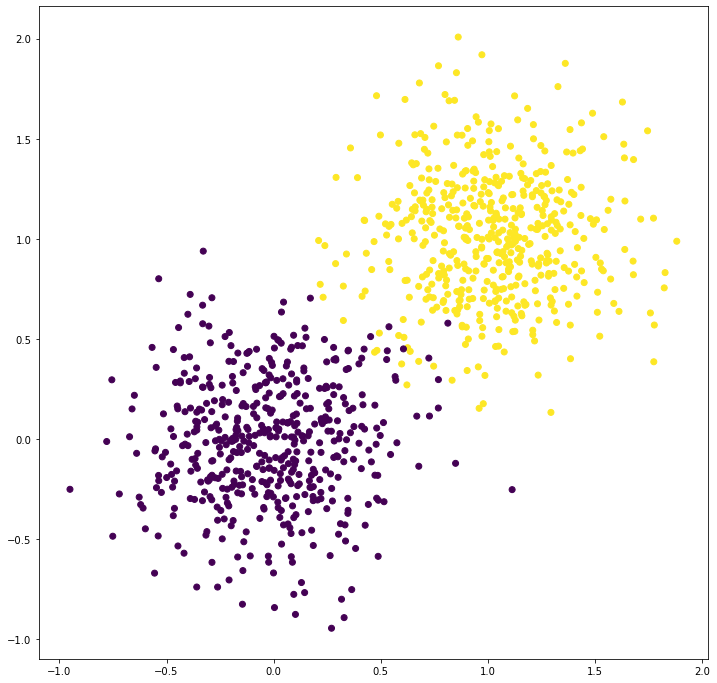

In [47]:
""" Data Generation """
cov = [[0.1, 0], [0, 0.1]]
xi0, xi1, yi = [], [], []
for i in range(1000):
    y = round(np.random.rand())
    yi.append(y)
    xx0, xx1 = np.random.multivariate_normal([y, y], cov).T
    xi0.append(xx0)
    xi1.append(xx1)
figure(figsize=(12,12))
plt.scatter(xi0, xi1, marker='o', c = yi)
plt.show()

In [68]:
""" Model construction """
X = np.array([xi0, xi1]).T
y = yi
clf = LogisticRegression(random_state=0).fit(X, y)
print(X[1], clf.decision_function(X)[1])

[-0.24005973  0.17212244] -5.38383752764816


In [75]:
""" Result """
ypred = clf.predict(X)
acc = 1-sum(abs(y-ypred))/1000
print('Accuracy: %.3f' % acc)
print(clf.intercept_)
print(clf.coef_)
print('y_i = L(%.2f + %.2f * x_i0 + %.2f * x_i1)' % (clf.intercept_, clf.coef_[0][0], clf.coef_[0][1]))

Accuracy: 0.989
[-5.08443803]
[[5.008857   5.24641262]]
y_i = L(-5.08 + 5.01 * x_i0 + 5.25 * x_i1)


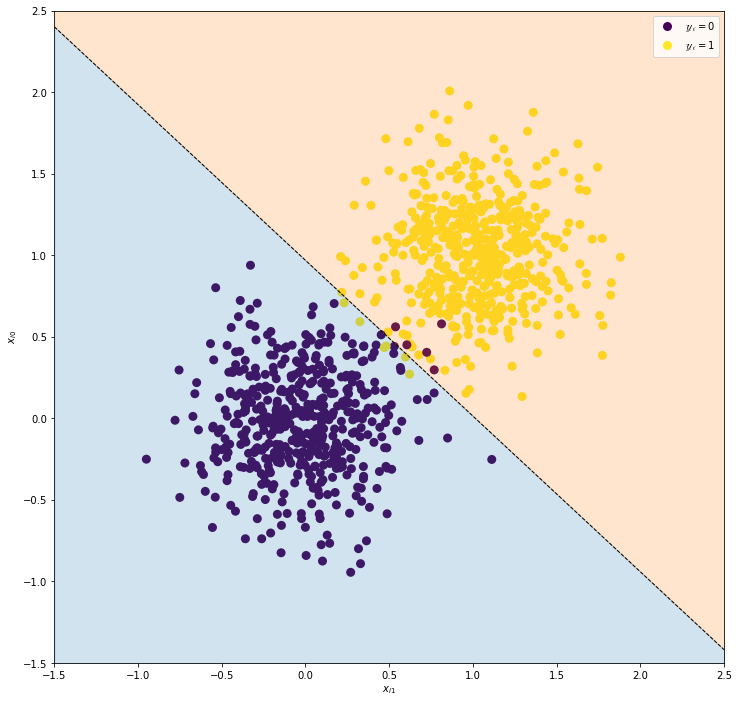

In [84]:
""" Bonus (Draw boundary) """
# Draw data
figure(figsize=(12,12))
df = pd.DataFrame({"x":np.array(xi0).flatten(), 
                   "y":np.array(xi1).flatten(), 
                   "colors":np.array(y).flatten()})

size=81
sc = plt.scatter(df['x'], df['y'], s=size, c=df['colors'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label=r'$\mathscr{y}_\mathscr{i} = %d$'%i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(df["colors"])]
plt.legend(handles=handles)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1.5, 2.5
ymin, ymax = -1.5, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[y==0].T, s=8, alpha=0.5)
plt.scatter(*X[y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_{i0}$')
plt.xlabel(r'$x_{i1}$')
plt.legend()

plt.show()